<a href="https://colab.research.google.com/github/ginalfaaliza/DQLab_Python-for-Data-Science/blob/main/Sales_%26_Advertising_Ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization Sales Performance based on Advertising Budget


In [70]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [71]:
df= pd.read_csv('/content/drive/MyDrive/Respository/source/Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [72]:
print('---Ukuran dataset---')
print(df.shape)
print('\n---Detail of MV---')
print(df.isnull().sum())

---Ukuran dataset---
(200, 5)

---Detail of MV---
Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


There is no missing values in data

In [73]:
print('---data types---')
df.dtypes

---data types---


Unnamed: 0                   int64
TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

# Data Preparation

Drop unnessary column : [unnamed:0]

In [74]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(200, 4)

now, we have 4 columns and 200 rows

In [75]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [76]:
# Rename column
df.rename(columns={'TV Ad Budget ($)':'TV', 'Radio Ad Budget ($)':'Radio','Newspaper Ad Budget ($)':'Newspaper','Sales ($)':'Sales'}, inplace= True)

# EDA

In [77]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


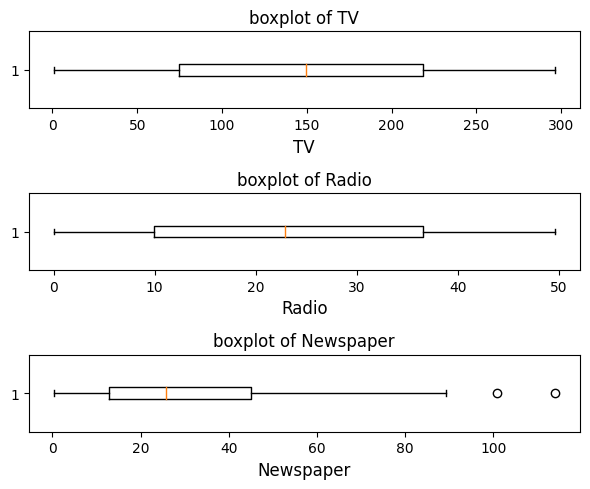

In [78]:
# Checking Outliers
check_outlier = df.columns[:-1]
# Create subplots
fig, axs= plt.subplots(len(check_outlier),1,figsize=(6,5))

for i, col in enumerate(check_outlier):
  axs[i].boxplot(df[col], vert= False)
  axs[i].set_title(f'boxplot of {col}')
  axs[i].set_xlabel(col, size=12)
plt.tight_layout()
plt.show()

There are no considerable outliers present in data

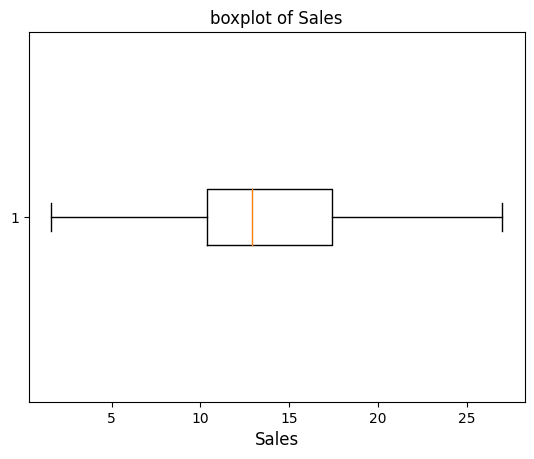

In [79]:
plt.boxplot(df['Sales'], vert= False)
plt.title('boxplot of Sales')
plt.xlabel('Sales', size=12)
plt.show()

There is no outlier present in variabel target

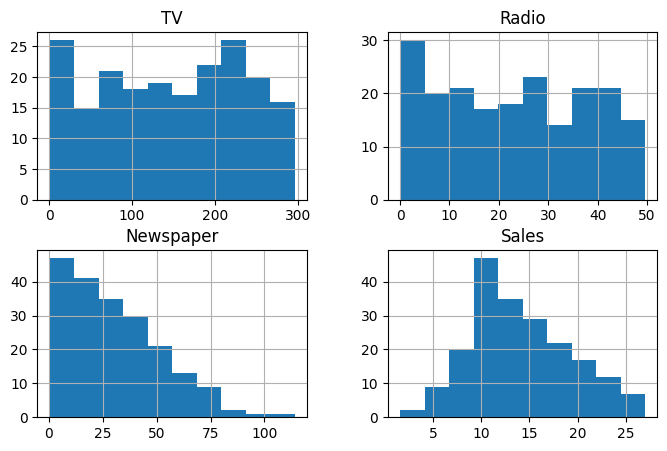

In [80]:
# Meilhat distribusi anggaran setiap media
# Looking the distribution for each media budgeting
df.hist(figsize=(8,5))
plt.show()

Newspaper have less budget spend for advertising

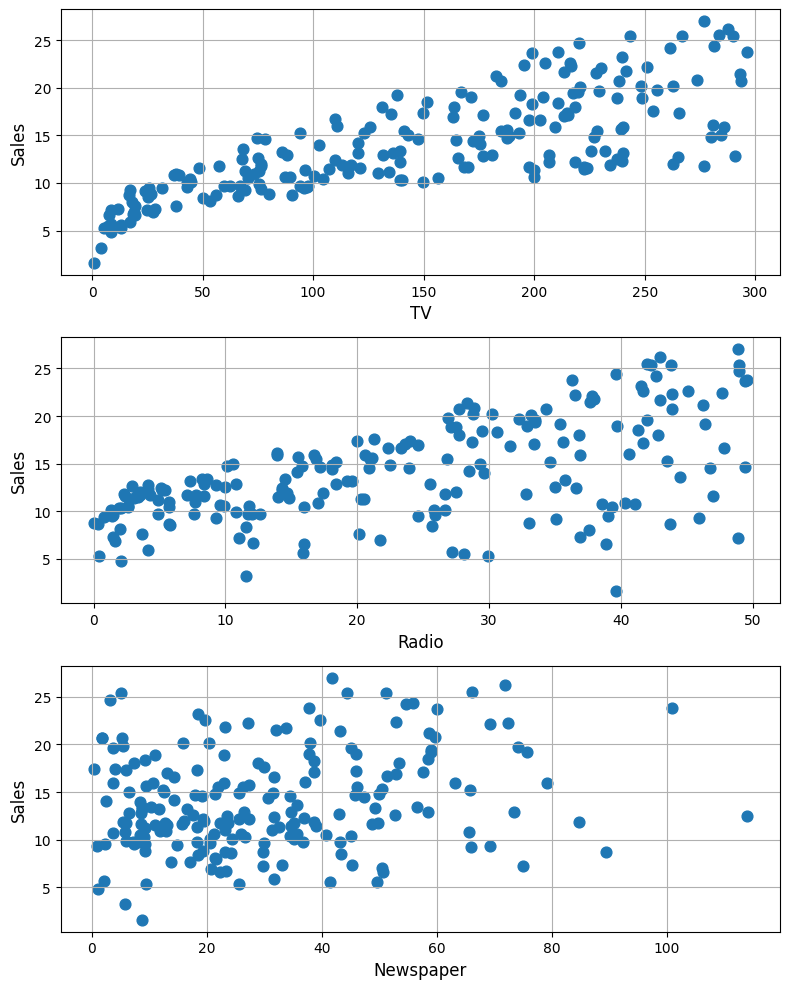

In [81]:
# Examining the effectiveness of advertising budget on sales through correlation analysis
# Independent variables
x_cols= df.columns[:-1]
# Dependent variable
y_cols= "Sales"

# Create subplots
fig, axs= plt.subplots(len(x_cols),1,figsize=(8,10))
# Looping scatter
for ax, x_col in zip (axs, x_cols):
  # conduct scatter plots
  df.plot.scatter(x=x_col, y=y_cols,s=60, ax=ax)
  ax.set_xlabel(x_col, size=12)
  ax.set_ylabel(y_cols, size=12)
  ax.grid()
plt.tight_layout()
plt.show()

In [82]:
# Correlation of Pearson
print("Coef. Correlation Pearson")
print("-"*25)
df.corr()['Sales']

Coef. Correlation Pearson
-------------------------


TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

TV Advertisement have a high impact on sales levels with coef. correlation is 0.78

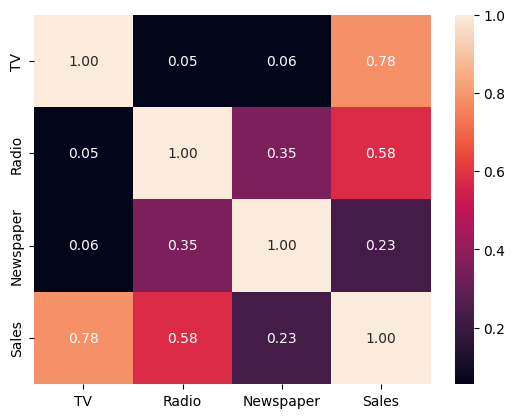

In [83]:
# Heatmap (Correlation Viz)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

# Multiple Regression Linear Model

**Data Prepocessing**

In [84]:
# Define dependent and independent variables
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [85]:
# Spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state= 100)

**Model Training**

In [86]:
# Simple Linear Regression/Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
reg= lr.fit(X_train, y_train)
print(f'Coefficient= {reg.coef_}')
print(f'Intercept= {reg.intercept_}')

Coefficient= [0.0455864  0.18569816 0.00223281]
Intercept= 2.8172751352950005


**Model Prediction**

In [87]:
y_pred= reg.predict(X_test)
print(y_pred)

[10.50948755 20.05723558 16.82665516 19.09405782 20.94383845 13.25348896
 11.87554518 12.4882643  20.51420388 20.91328754 10.90182094 19.44307823
  6.5040246  15.3178433   9.04147699  8.03952046 16.26581002 12.10312044
 17.12086602 11.28131376 17.07036157  9.84452136 20.70077487 17.17479561
 15.19498306 21.96631309 19.1587532  10.09216975 19.40214482 14.88180369
 14.27844074  7.69173892 10.00183154 14.82404891  7.29177732 13.63453936
  7.59380446 11.84106127 13.61631336 15.18810875]


**Metrics**

In [88]:
# RMSE
from sklearn.metrics import mean_squared_error
print(f'RMSE= {np.sqrt(mean_squared_error(y_test, y_pred))}')

# R-squared
from sklearn.metrics import r2_score
print(f'R-squared= {r2_score(y_test, y_pred)}')

RMSE= 1.316545776485106
R-squared= 0.9184369032278498


**Tuning**

In [89]:
import statsmodels.api as sm
X2= sm.add_constant(X)
model= sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.58e-96
Time:                        15:40:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

**P-Value**

TV and Radion is the variables have strong correlation between these coef, and the target (Sales).
Nespaper is not statiscallt significant, exclude the newspaper variable would slightly reduce the R^2 value

**R^2 and Adj R^2 value**

Therefore, about 80% of the variability of sales is explained by the amount spent on all variables ad

**F-statistic**

This is indicator between dependent and independent variables. F-Statistic must > 1 for the better regression model. we have 570.3 that indicates our model can demostrated relationship between Ad Spending with Sales.

**std error**

The coef. std error is measures how much our coefficient for each variables has distance from the actual average of our response variable (it measures the accuracy of coef. estimate). We have std error close to zero, its mean good